# Introduction to Neural Networks: transfer learning
# Image classification with ResNet

https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

https://colab.research.google.com/github/kjamithash/Pytorch_DeepLearning_Experiments/blob/master/FashionMNIST_ResNet_TransferLearning.ipynb#scrollTo=Lsbcb_WgFx3c

## Librairies

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.models as models
from torchvision.transforms import ToTensor, Lambda

import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [5]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
sample = training_data[35]

In [7]:
image = sample[0]
classe = sample[1]

In [8]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.1451, 0.7765, 0.0235,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0078, 0.0000, 0.0314, 0.3843, 0.1608, 0.4431,
          0.0000, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0078, 0.0000, 0.2980, 0.3216, 0.0000, 0.7922,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0157, 0.0000, 0.5451, 0.1686, 0.0000, 0.7569,
          0.1255, 0.0000, 0.0078, 0.0000, 0.0000, 0.0000,

In [9]:
classe

8

In [10]:
image.shape

torch.Size([1, 28, 28])

In [11]:
def display_sample(sample):

  image = sample[0].reshape([sample[0].shape[1], sample[0].shape[2]])
  label = sample[1]

  plt.imshow(image)
  plt.show()

  print(f"class: {label}")

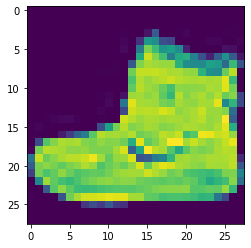

class: 9


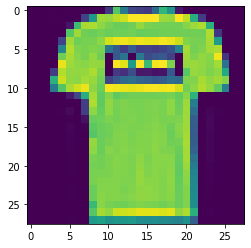

class: 0


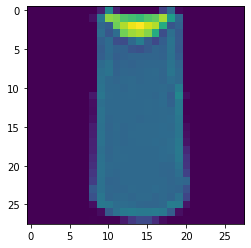

class: 0


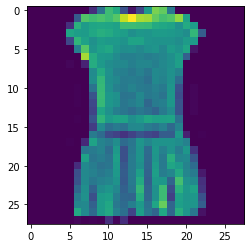

class: 3


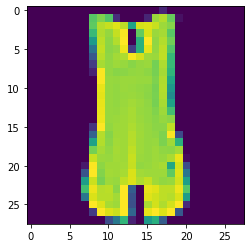

class: 0


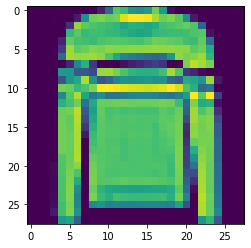

class: 2


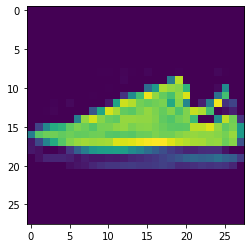

class: 7


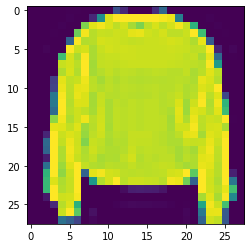

class: 2


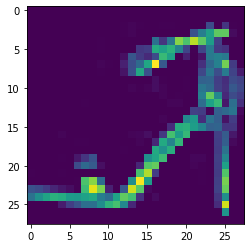

class: 5


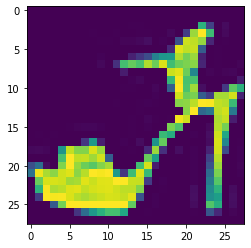

class: 5


In [12]:
for i in range(10):
  display_sample(training_data[i])

## Dataloader

In [13]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

## Neural network

In [14]:
class MnistResNet(nn.Module):
  def __init__(self, in_channels=1):
    super(MnistResNet, self).__init__()

    # Load a pretrained resnet model from torchvision.models in Pytorch
    self.model = models.resnet50(pretrained=True)

    # Change the input layer to take Grayscale image, instead of RGB images. 
    # Hence in_channels is set as 1 or 3 respectively
    # original definition of the first layer on the ResNet class
    # self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
    self.model.conv1 = nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)
    
    # Change the output layer to output 10 classes instead of 1000 classes
    num_ftrs = self.model.fc.in_features
    self.model.fc = nn.Linear(num_ftrs, 10)

  def forward(self, x):
    return self.model(x)

In [15]:
model = MnistResNet()

In [16]:
model

MnistResNet(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [17]:
loss_fn = nn.CrossEntropyLoss()

In [18]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training loop



In [20]:
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [21]:
model.to(device)

MnistResNet(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [22]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device) # put tensor to the device (GPU)
        y = y.to(device) # put tensor to the device (GPU)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [23]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device) # put tensor to the device (GPU)
            y = y.to(device) # put tensor to the device (GPU)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [24]:
epochs = 5

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
    
print("Done!")

Epoch 1
-------------------------------
loss: 2.412605  [    0/60000]
loss: 1.740432  [ 6400/60000]
loss: 1.066762  [12800/60000]
loss: 1.001602  [19200/60000]
loss: 0.770426  [25600/60000]
loss: 0.677941  [32000/60000]
loss: 0.763176  [38400/60000]
loss: 0.684322  [44800/60000]
loss: 0.601670  [51200/60000]
loss: 0.679487  [57600/60000]
Test Error: 
 Accuracy: 78.5%, Avg loss: 0.606320 

Epoch 2
-------------------------------
loss: 0.561832  [    0/60000]
loss: 0.708567  [ 6400/60000]
loss: 0.362377  [12800/60000]
loss: 0.612936  [19200/60000]
loss: 0.544080  [25600/60000]
loss: 0.492763  [32000/60000]
loss: 0.563542  [38400/60000]
loss: 0.497431  [44800/60000]
loss: 0.454805  [51200/60000]
loss: 0.469451  [57600/60000]
Test Error: 
 Accuracy: 81.5%, Avg loss: 0.515852 

Epoch 3
-------------------------------
loss: 0.460046  [    0/60000]
loss: 0.505116  [ 6400/60000]
loss: 0.223970  [12800/60000]
loss: 0.482355  [19200/60000]
loss: 0.376208  [25600/60000]
loss: 0.411290  [32000/600

## Predictions

In [38]:
def predict_sample(sample, model):

  model.eval()
  image = sample[0].unsqueeze(0).to(device)
  label = sample[1]

  pred = model(image)
  pred = pred.argmax(1).item()

  if pred == label:
    print("The prediction of the model is correct:")
  else:
    print("The prediction of the model is incorrect:")
  print(f"Prediction: class {pred}")
  print(f"True label: class {label}")

  return pred, label


In [39]:
sample[0].unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [40]:
predict_sample(sample, model)

The prediction of the model is correct:
Prediction: class 8
True label: class 8


(8, 8)

## Saving and loading the model

In [41]:
torch.save(model.state_dict(), "./ResNet.pt")

In [46]:
model = MnistResNet().to(device)
model_state_dict = torch.load("./ResNet.pt")
model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [47]:
predict_sample(sample, model)

The prediction of the model is correct:
Prediction: class 8
True label: class 8


(8, 8)